In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as offline
from plotly.graph_objs import *

offline.init_notebook_mode()

Text(0, 0.5, 'Количество игроков')

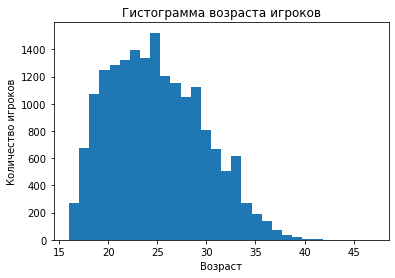

In [3]:
# Гистограмма возраста игроков. Показывает доминирующий возраст и особенности распределения игроков.
# Подавляющее большинство игроков имеет возраст от 16 до 35 лет.

df = pd.read_csv('CompleteDataset.csv')
df.Age.plot.hist(bins=30)
plt.title('Гистограмма возраста игроков')
plt.xlabel('Возраст')
plt.ylabel('Количество игроков')

In [4]:
# Распределение средней зарплаты в зависимости от эффективности игрока.
# Показывает изменение ценности игрока с ростом его эффективности (хорошие игроки стоят дороже).

df = pd.read_csv('CompleteDataset.csv')
df.Wage = df.Wage.apply(lambda x: x.replace('€','')).apply(lambda x: x.replace('K','000')).astype(np.int64)
wage_eff_dep = df.groupby('Overall').Wage.mean()
plt.plot(wage_eff_dep)
plt.title('График зависимости средней зарплаты от эффективности игрока')
plt.xlabel('Эффективность')
plt.ylabel('Средняя зарплата')

Text(0, 0.5, 'Средняя зарплата')

In [7]:
# Распределение наибольшей эффективности игрока в зависимости от национальности.
# Показывает национальность особенно ярких игроков. Показывает эффективность лучшего игрока страны.
# Ожидаемо, что в "сильных" футбольных странах выше шанс встретить сильного игрока.

df = pd.read_csv('CompleteDataset.csv')
eff_nat_dep = df.groupby('Nationality').Overall.max().sort_values(ascending=True)
trace = Scatter(x=eff_nat_dep.index,
                y=eff_nat_dep,
                mode='markers'
                )
data = Data([trace])
layout = Layout(
    title='График зависимости максимальной эффективности от национальности игроков',
    xaxis=dict(title='Национальность'),
    yaxis=dict(title='Максимальная эффективность')
)
fig = Figure(data=data, layout=layout)
offline.iplot(fig)

In [8]:
# Распределение средней зарплаты игрока в зависимости от клуба.
# Показывает средние периодические траты клуба на одного игрока.
# Показывает сколько в среднем денег готов платить клуб игроку в случае найма.

df = pd.read_csv('CompleteDataset.csv')
df.Wage = df.Wage.apply(lambda x: x.replace('€','')).apply(lambda x: x.replace('K','000')).astype(np.int64)
club_wage_dep = df.groupby('Club').Wage.mean().sort_values(ascending=True)
trace = Bar(x=club_wage_dep.index,
            y=club_wage_dep,
            )
data = Data([trace])
layout = Layout(
    title='График зависимости средней зарплаты игрока от клуба',
    xaxis=dict(title='Клуб'),
    yaxis=dict(title='Средняя зарплата')
)
fig = Figure(data=data, layout=layout)
offline.iplot(fig)